## Etapa 1: Instalação da biblioteca

In [17]:
!pip install pmdarima

## Etapa 2: Importação das bibliotecas

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

## Etapa 3: Carregamento da base de dados

In [19]:
# Base: quantidade de voos realizados em determinado período
dataset = pd.read_csv('AirPassengers.csv')

In [20]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [21]:
# prompt: Using dataframe dataset: transform in time series format

# Convert 'Month' column to datetime objects if it's not already
dataset['Month'] = pd.to_datetime(dataset['Month'])

# Set 'Month' as the index
dataset = dataset.set_index('Month')

# Now the DataFrame 'dataset' is in time series format with 'Month' as the index
# You can verify this by inspecting the index using:
# print(dataset.index)
dataset.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [22]:
dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [23]:
time_series = dataset['#Passengers']

In [24]:
time_series

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## Etapa 4: Exploração da série temporal

In [26]:
time_series['1949-02']

,#Passengers
Month,
1949-02-01,118


In [27]:
time_series[datetime(1949,2,1)]

118

In [28]:
time_series['1950-01-01':'1950-07-31']

,#Passengers
Month,
1950-01-01,115
1950-02-01,126
1950-03-01,141
1950-04-01,135
1950-05-01,125
1950-06-01,149
1950-07-01,170


In [29]:
time_series[:'1950-07-31']

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [30]:
time_series['1950']

,#Passengers
Month,
1950-01-01,115
1950-02-01,126
1950-03-01,141
1950-04-01,135
1950-05-01,125
1950-06-01,149
1950-07-01,170
1950-08-01,170
1950-09-01,158


In [31]:
time_series.index.max()

Timestamp('1960-12-01 00:00:00')

In [32]:
time_series.index.min()

Timestamp('1949-01-01 00:00:00')

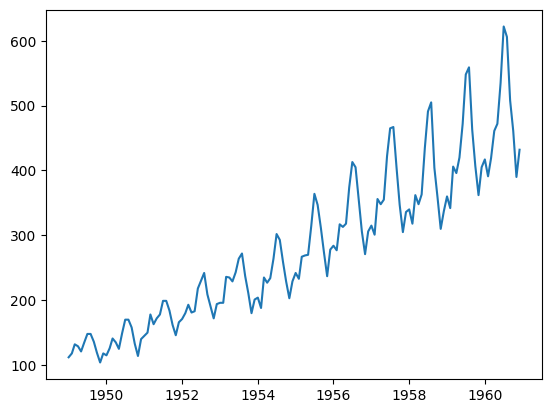

In [33]:
# Gráfico da série temporal
plt.plot(time_series)

<ipython-input-34-53e1425a7ecd>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  time_series_ano = time_series.resample('A').sum()


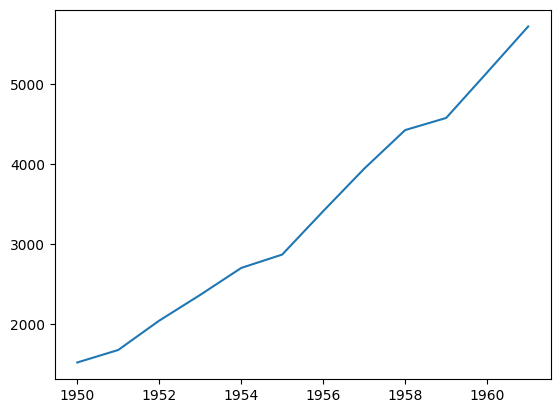

In [34]:
# Agrupado por ano (soma do ano)
time_series_ano = time_series.resample('A').sum()
plt.plot(time_series_ano)

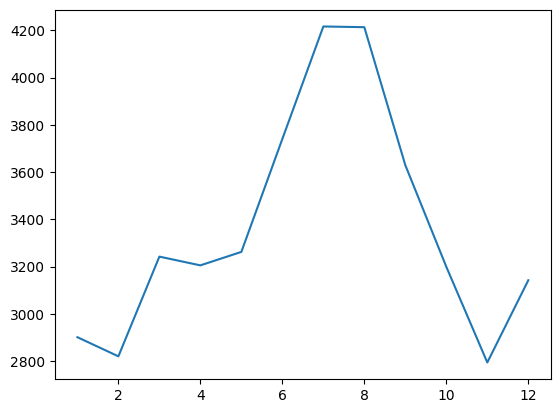

In [36]:
# Agrupado por mês
time_series_mes = time_series.groupby([lambda x: x.month]).sum()
plt.plot(time_series_mes)

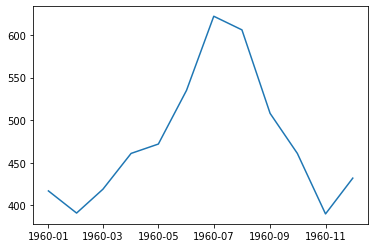

In [ ]:
# Período de apenas um ano (filtro)
time_series_datas = time_series['1960-01-01':'1960-12-01']
plt.plot(time_series_datas)

## Etapa 5: Decomposição da série temporal

In [38]:
decomposicao = seasonal_decompose(time_series)
tendencia = decomposicao.trend # tendência da série: crescimento, diminuição
sazonal = decomposicao.seasonal # efeito sazonal
aleatorio = decomposicao.resid

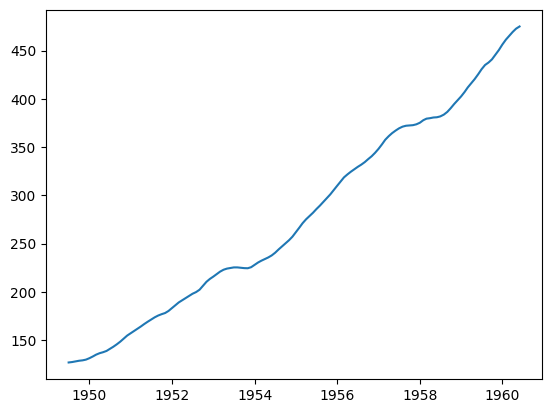

In [39]:
plt.plot(tendencia)

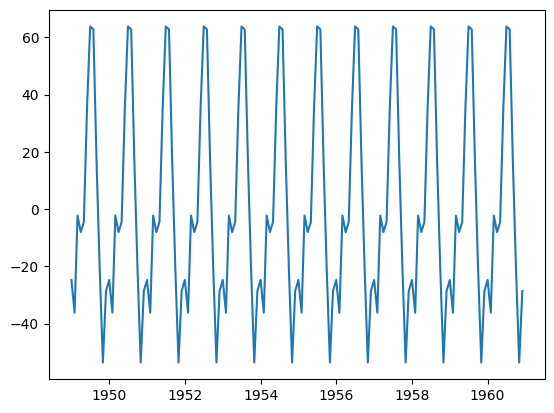

In [40]:
plt.plot(sazonal)

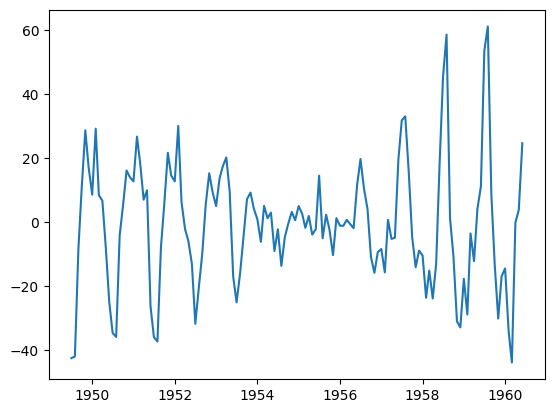

In [41]:
plt.plot(aleatorio)

## Etapa 6: Previsões com ARIMA

In [42]:
# Parâmetors P, Q e D
model = auto_arima(time_series)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

In [43]:
model.order

(4, 1, 3)

In [44]:
# Previsão de dois anos para frente
predictions = model.predict(n_periods=24)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [45]:
predictions

,0
1961-01-01,467.573736
1961-02-01,490.494460
1961-03-01,509.136849
1961-04-01,492.554702
1961-05-01,495.305965
1961-06-01,475.947817
1961-07-01,476.339865
1961-08-01,475.552147
1961-09-01,472.353805
1961-10-01,483.889647


## Etapa 7 - Gráfico das previsões

In [46]:
len(time_series)

144

In [47]:
# Vamos pegar do primeiro registro até o registro 130
train = time_series[:130]
train.shape

(130,)

In [48]:
train.index.min(), train.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1959-10-01 00:00:00'))

In [49]:
# Criando uma base de dados com o resto dos dados, para teste
test = time_series[130:]
test.shape

(14,)

In [50]:
test.index.min(), test.index.max()

(Timestamp('1959-11-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [52]:
model2 = auto_arima(train, suppress_warnings=True);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

In [53]:
test.index

DatetimeIndex(['1959-11-01', '1959-12-01', '1960-01-01', '1960-02-01',
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [55]:
# Previsão para 14 meses a frente
prediction = pd.DataFrame(model2.predict(n_periods=14), index=test.index)
prediction.columns = ['passengers_predictions']
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,passengers_predictions
Month,
1959-11-01,357.690511
1959-12-01,334.857449
1960-01-01,342.488592
1960-02-01,375.944534
1960-03-01,424.126300
1960-04-01,473.151468
1960-05-01,510.388415
1960-06-01,527.724284
1960-07-01,523.268370


In [56]:
test

,#Passengers
Month,
1959-11-01,362
1959-12-01,405
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622


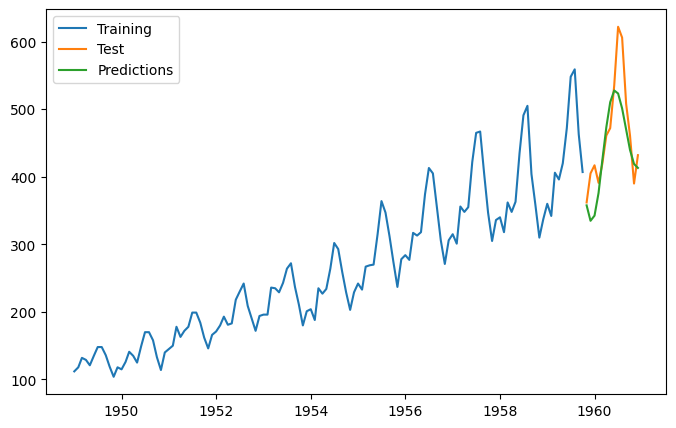

In [57]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predictions')
plt.legend();